# Tarea 9
## Non parametric Kruskal-Wallis

In [ ]:
def import_csv(file):
    import pandas as pd
    return pd.read_csv(file)

In [1]:
path = "data/Terminos_lagoon_TA_DIC_2023_RawData.csv"

co2_data = import_csv(path)

NameError: name 'import_csv' is not defined

In [7]:
from scipy.stats import kruskal

def kruskal_wallis_test(*groups, alpha=0.05):
    """
    Performs the Kruskal-Wallis H-test for independent samples.
    Accepts multiple groups as arguments.
    Prints the H statistic, p-value, and interpretation.
    """
    result = kruskal(*groups)
    
    print(f"H statistic = {result.statistic}")
    print(f"p-value = {result.pvalue}")
    
    if result.pvalue < alpha:
        print("The difference between groups is statistically significant.")
    else:
        print("No statistically significant difference between groups.")

In [5]:
%pip install scikit-posthocs

import scikit_posthocs as sp

In [6]:
def dunn_posthoc(data, group_col, value_col, p_adjust='bonferroni'):
    """
    Runs Dunn's post-hoc test after Kruskal-Wallis.
    """
    result = sp.posthoc_dunn(data, val_col=value_col, group_col=group_col, p_adjust=p_adjust)
    print(result)
    return result

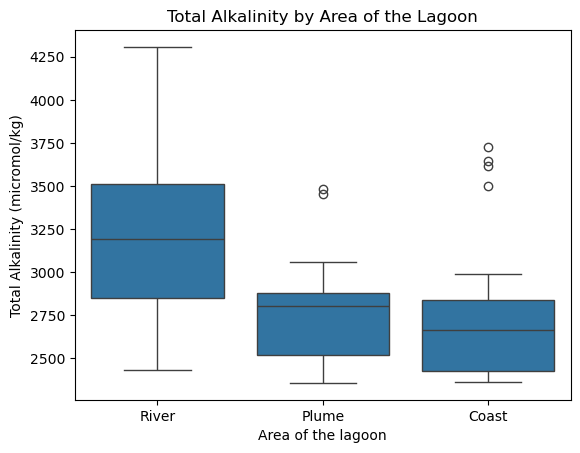

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='area', y='ta_micromol_kg', data=co2_data)
plt.xlabel('Area of the lagoon')
plt.ylabel('Total Alkalinity (micromol/kg)')
plt.title('Total Alkalinity by Area of the Lagoon')
plt.show()

In [ ]:
ta_river = co2_data[co2_data['area'] == 'River']['ta_micromol_kg']
ta_plume = co2_data[co2_data['area'] == 'Plume']['ta_micromol_kg']
ta_coast= co2_data[co2_data['area'] == 'Coast']['ta_micromol_kg']

In [10]:
kruskal_wallis_test(ta_river, ta_plume, ta_coast)

H statistic = 23.340675555846637
p-value = 8.543517259038796e-06
The difference between groups is statistically significant.


In [11]:
dunn_posthoc(co2_data, 'area', 'ta_micromol_kg')

          Coast     Plume     River
Coast  1.000000  1.000000  0.000016
Plume  1.000000  1.000000  0.000659
River  0.000016  0.000659  1.000000


,Coast,Plume,River
Coast,1.000000,1.000000,0.000016
Plume,1.000000,1.000000,0.000659
River,0.000016,0.000659,1.000000


## Perform Kruskal-Wallis test and a box plot for DIC data for each area.

In [12]:
co2_data.columns

Index(['sample', 'date', 'estuary', 'area', 'station', 'layer_depth', 'season',
       'chlorophy_microg_l', 'cond_microsiemens_cm', 'depth_m',
       'do_percent_sat', 'do_mg_l', 'sal_psu', 'sp_cond_microsiemens_cm',
       'turbidity_fnu', 'temp_c', 'latitude', 'longitude', 'dic_micromol_kg',
       'ta_micromol_kg', 'dummy_data'],
      dtype='object')

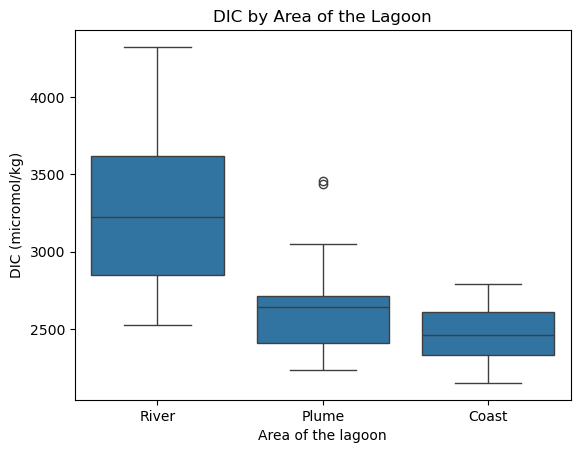

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='area', y='dic_micromol_kg', data=co2_data, legend=True)
plt.xlabel('Area of the lagoon')
plt.ylabel('DIC (micromol/kg)')
plt.title('DIC by Area of the Lagoon')
plt.show()

In [15]:
dic_river = co2_data[co2_data['area'] == 'River']['dic_micromol_kg']
dic_plume = co2_data[co2_data['area'] == 'Plume']['dic_micromol_kg']
dic_coast= co2_data[co2_data['area'] == 'Coast']['dic_micromol_kg']

In [16]:
kruskal_wallis_test(dic_river, dic_plume, dic_coast)

H statistic = 55.889669058187486
p-value = 7.306553461098262e-13
The difference between groups is statistically significant.


In [17]:
dunn_posthoc(co2_data, 'area', 'dic_micromol_kg')

              Coast     Plume         River
Coast  1.000000e+00  0.063144  7.204720e-13
Plume  6.314392e-02  1.000000  1.885873e-06
River  7.204720e-13  0.000002  1.000000e+00


,Coast,Plume,River
Coast,1.000000e+00,0.063144,7.204720e-13
Plume,6.314392e-02,1.000000,1.885873e-06
River,7.204720e-13,0.000002,1.000000e+00


## Perform Kruskal-Wallis test and a box plot for Tempearature data for each area.

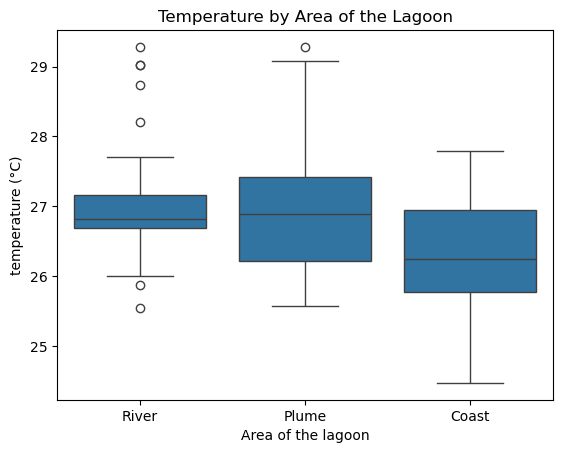

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='area', y='temp_c', data=co2_data, legend=True) 
plt.xlabel('Area of the lagoon')
plt.ylabel('temperature (°C)')
plt.title('Temperature by Area of the Lagoon')
plt.show()

In [19]:
temp_river = co2_data[co2_data['area'] == 'River']['temp_c']
temp_plume = co2_data[co2_data['area'] == 'Plume']['temp_c']
temp_coast= co2_data[co2_data['area'] == 'Coast']['temp_c']

In [20]:
kruskal_wallis_test(temp_river, temp_plume, temp_coast)

H statistic = 7.6996429549091365
p-value = 0.021283535690208223
The difference between groups is statistically significant.


In [21]:
dunn_posthoc(co2_data, 'area', 'dic_micromol_kg')

              Coast     Plume         River
Coast  1.000000e+00  0.063144  7.204720e-13
Plume  6.314392e-02  1.000000  1.885873e-06
River  7.204720e-13  0.000002  1.000000e+00


,Coast,Plume,River
Coast,1.000000e+00,0.063144,7.204720e-13
Plume,6.314392e-02,1.000000,1.885873e-06
River,7.204720e-13,0.000002,1.000000e+00
